#                      Classification - 1

Evaluation Criteria

Scoring (15 max):

●	EDA: exploration of variables and properties of data with conclusions: 1

●	Data preprocessing if needed: 2

    ○	Handling missing values
    
    ○	Dropping unimportant features
    
    ○	Data normalization
    
    ○	Categorical encoding
    
●	Metrics and cross-validation have been chosen based on target distribution as well as reasoning behind: 3

●	Feature importance and hyperparameters tuning (http://scikit-learn.org/stable/modules/classes.html#hyper-parameter-optimizers): 1

●	Models

    ○	Logistic Regression w\wo regularization: 2
    
    ○	K-nearest neighbours: 1
    
●	Quality of delivered work:

    ○	Analytical comments provided: 1
    
    ○	The experiment is structured (file is readable, pictures have titles): 1
    
    ○	 Code is clear (reusable code in functions, comments, code is easy readable): 1
    
●	Extra points for improvements not considered in the criteria: 2


Target variable: "Class"

### Оглавление

1. Preluminaries

    a. Auxiliary functions

    b. Download & Overview
    

2. EDA & Data preprocessing: with conclusions¶

    a. Starting working with missing values
    
    b. Categorical encoding
    
    c. Different plots.
    
    d. Handling missing values
    
    e. Outliers
    
    f. Data normalization

    g. Conclusion
    
    
3. Models

    a. Auxiliary functions¶
    
    b. Metrics and cross-validation have been chosen based on target distribution as well as reasoning behind
    
    c. Logistic Regression with regularization
    
    d. Logistic Regression without regularization
    
    e. K-nearest neighbours
    
    f. Conclusion


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn_pandas import DataFrameMapper, gen_features
from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, LabelEncoder

plt.rcParams['figure.figsize'] = 12, 12

import warnings
warnings.filterwarnings('ignore')

from google_drive_downloader import GoogleDriveDownloader as gdd

%matplotlib inline

### Preliminaries

#### Auxiliary functions

In [ ]:
# Подсчет встречаемости категорий в переменных
def count_value(X):
    
    for column in X:
    
        print (column)
        print (df[column].value_counts())
        print ()

#### Download & Overview

In [ ]:
# loading dataset
gdd.download_file_from_google_drive(file_id='15_Lb9vACQd2IBAEpNRkXP-1e0EXzozPF',\
                                    dest_path='/data/dataset_57_hypothyroid.csv')
df = pd.read_csv('/data/dataset_57_hypothyroid.csv', sep=',')

In [ ]:
df.sample(5).T

,995,1560,3185,2650,1703
age,34,71,62,68,56
sex,F,M,F,F,M
on_thyroxine,f,f,f,f,f
query_on_thyroxine,f,f,f,f,f
on_antithyroid_medication,t,f,f,f,f
sick,f,f,f,f,f
pregnant,t,f,f,f,f
thyroid_surgery,f,f,f,f,f
I131_treatment,f,f,f,f,f
query_hypothyroid,f,f,f,f,f


### EDA & Data preprocessing: with conclusions

In [ ]:
#Info about the data types and numerical values of the features in our data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [ ]:
df.shape

(3772, 30)

#### Starting working with missing values

In [ ]:
df.describe().T

,count,unique,top,freq
age,3772,94,59,95
sex,3772,3,F,2480
on_thyroxine,3772,2,f,3308
query_on_thyroxine,3772,2,f,3722
on_antithyroid_medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid_surgery,3772,2,f,3719
I131_treatment,3772,2,f,3713
query_hypothyroid,3772,2,f,3538


In [ ]:
# Посчитаем, а сколько всего Nan
df.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
Class                        0
dtype: int64

Nanoв нет. Но из таблицы describe видно, что есть пропущенные значения ('?'). Их достаточно много. Попытаемся выработать тактику, что с ними делать.

In [ ]:
count_value(df)

age
59     95
60     91
70     90
73     81
55     81
       ..
?       1
4       1
455     1
6       1
5       1
Name: age, Length: 94, dtype: int64

sex
F    2480
M    1142
?     150
Name: sex, dtype: int64

on_thyroxine
f    3308
t     464
Name: on_thyroxine, dtype: int64

query_on_thyroxine
f    3722
t      50
Name: query_on_thyroxine, dtype: int64

on_antithyroid_medication
f    3729
t      43
Name: on_antithyroid_medication, dtype: int64

sick
f    3625
t     147
Name: sick, dtype: int64

pregnant
f    3719
t      53
Name: pregnant, dtype: int64

thyroid_surgery
f    3719
t      53
Name: thyroid_surgery, dtype: int64

I131_treatment
f    3713
t      59
Name: I131_treatment, dtype: int64

query_hypothyroid
f    3538
t     234
Name: query_hypothyroid, dtype: int64

query_hyperthyroid
f    3535
t     237
Name: query_hyperthyroid, dtype: int64

lithium
f    3754
t      18
Name: lithium, dtype: int64

goitre
f    3738
t      34
Name: goitre, dtype: int64

tumor
f    3676
t      96
Nam

Очень много всего. Глаза разбегаются. Надо как-то попроще все сделать. Поэтому создадим таблицу для подсчета пропусков в каждом столбце.

Хочется написать процентное соотношение, сколько процентов занимает '?' от общего количества значений 3772. И выделить сразу же те, в которых больше 0.7. Такие столбцы мы удалим.

Зададим pandasdataframe для этого. 

In [ ]:
a = []
for column in df.columns:
    b = (df[column]=="?").sum()/df.shape[0]
    b = round (b, 2)
    a.append(b)

In [ ]:
pf = pd.DataFrame({"Column": df.columns, "Percentage": a})
pf

,Column,Percentage
0,age,0.00
1,sex,0.04
2,on_thyroxine,0.00
3,query_on_thyroxine,0.00
4,on_antithyroid_medication,0.00
5,sick,0.00
6,pregnant,0.00
7,thyroid_surgery,0.00
8,I131_treatment,0.00
9,query_hypothyroid,0.00


In [ ]:
pf[pf.Percentage >= 0.5]

,Column,Percentage
27,TBG,1.0


Есть колонка, состоящая только из '?' - 'TBG'. Удалим его. Так как соотношение у других меньше, то оставим их. 

Заметим, что пропуск в неком столбце i означает, что измерение не было проведено, а значит и результат неизвестен. Также, мы выяснили, что TBG не был замерен ни у кого, поэтому его можно удалить вместе с TBG_measured.

In [ ]:
df.drop(columns=['TBG','TBG_measured'],inplace=True)

In [ ]:
df.head().T

,0,1,2,3,4
age,41,23,46,70,70
sex,F,F,M,F,F
on_thyroxine,f,f,f,t,f
query_on_thyroxine,f,f,f,f,f
on_antithyroid_medication,f,f,f,f,f
sick,f,f,f,f,f
pregnant,f,f,f,f,f
thyroid_surgery,f,f,f,f,f
I131_treatment,f,f,f,f,f
query_hypothyroid,f,f,f,f,f


'?' стало значительно меньше. Но с ними неудобно работать. Сделаем замену "?" на NaN.

In [ ]:
df.replace(to_replace='?', value = np.NaN, inplace = True)

Вот теперь, когда убрали совсем все явно лишнее, посмотрим, как ведут себя наши переменные. Отметим, что оставшиеся NaNы будут заполнены в дальнейшем с помощью недавно освоенного алгоритма KNN.

Теперь хочется посмотреть на какие-нибудь распределения фичей.

In [ ]:
df.shape

(3772, 28)

In [ ]:
count_value(df)

age
59     95
60     91
70     90
73     81
55     81
       ..
4       1
10      1
455     1
6       1
5       1
Name: age, Length: 93, dtype: int64

sex
F    2480
M    1142
Name: sex, dtype: int64

on_thyroxine
f    3308
t     464
Name: on_thyroxine, dtype: int64

query_on_thyroxine
f    3722
t      50
Name: query_on_thyroxine, dtype: int64

on_antithyroid_medication
f    3729
t      43
Name: on_antithyroid_medication, dtype: int64

sick
f    3625
t     147
Name: sick, dtype: int64

pregnant
f    3719
t      53
Name: pregnant, dtype: int64

thyroid_surgery
f    3719
t      53
Name: thyroid_surgery, dtype: int64

I131_treatment
f    3713
t      59
Name: I131_treatment, dtype: int64

query_hypothyroid
f    3538
t     234
Name: query_hypothyroid, dtype: int64

query_hyperthyroid
f    3535
t     237
Name: query_hyperthyroid, dtype: int64

lithium
f    3754
t      18
Name: lithium, dtype: int64

goitre
f    3738
t      34
Name: goitre, dtype: int64

tumor
f    3676
t      96
Name: tumor, 

In [ ]:
a = []
c = []
for column in df.columns:
    
    b = len(df[column].unique())
    a.append(b)
    
    d = df[column].isna().sum()
    c.append(d)

In [ ]:
sf = pd.DataFrame({"Column": df.columns, "Unique": a, 'Nan': c})
sf

,Column,Unique,Nan
0,age,94,1
1,sex,3,150
2,on_thyroxine,2,0
3,query_on_thyroxine,2,0
4,on_antithyroid_medication,2,0
5,sick,2,0
6,pregnant,2,0
7,thyroid_surgery,2,0
8,I131_treatment,2,0
9,query_hypothyroid,2,0


Теперь внимательно смотрим две имеющиеся таблицы, и пытаемся понять, что будем делать дальше.

У нас в переменной "Class" одно из значений встречается лишь дважды.

Class

negative                   3302

compensated_hypothyroid     194

primary_hypothyroid          95

secondary_hypothyroid         2

Отметим, что имею лишь два объекта, сделать предсказание очень сложно. Так как для этого нам требуется провести разбиение на train и test со стратификацией, а так же сделать кросс валидацию, следовательно мы просто не сможем предсказывать данный класс. Удалим строчки с данными значениями.

А в еще одной фиче все значения, кроме одного - f.  

hypopituitary

f    3592

t       1

Ситуация аналогична уже рассмотренной. Можно вообще удалить этот столбец.

In [ ]:
df = df.loc[df.Class != 'secondary_hypothyroid']
df.drop(columns=['hypopituitary'],inplace=True)

Удалим строку 'hypopituitary' и из sf.

In [ ]:
sf.drop([14], inplace=True)
sf.reset_index(drop = True, inplace = True)
sf

,Column,Unique,Nan
0,age,94,1
1,sex,3,150
2,on_thyroxine,2,0
3,query_on_thyroxine,2,0
4,on_antithyroid_medication,2,0
5,sick,2,0
6,pregnant,2,0
7,thyroid_surgery,2,0
8,I131_treatment,2,0
9,query_hypothyroid,2,0


#### Categorical encoding

In [ ]:
sf [sf.Unique == 2]['Column'].unique()

array(['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
       'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment',
       'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre',
       'tumor', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured',
       'T4U_measured', 'FTI_measured'], dtype=object)

В колонках с двумя вариантами ответа ('f' и 't') проведем бинарную замену.

In [ ]:
for column in sf [sf.Unique == 2]['Column'].unique():
    df[column].replace({'f': 0, 't': 1}, inplace = True)

In [ ]:
df.head(5).T

,0,1,2,3,4
age,41,23,46,70,70
sex,F,F,M,F,F
on_thyroxine,0,0,0,1,0
query_on_thyroxine,0,0,0,0,0
on_antithyroid_medication,0,0,0,0,0
sick,0,0,0,0,0
pregnant,0,0,0,0,0
thyroid_surgery,0,0,0,0,0
I131_treatment,0,0,0,0,0
query_hypothyroid,0,0,0,0,0


В колонках с тремя вариантами ответа, один из которых NaN, проведем бинарную замену.

In [ ]:
sf [(sf.Unique == 3) & (sf.Nan > 0)]

,Column,Unique,Nan
1,sex,3,150


In [ ]:
df['sex'].replace({'F': 0, 'M': 1}, inplace = True)

Отлично. Заменять больше в таком стиле ничего не нужно.

In [ ]:
df.dtypes

age                           object
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
sick                           int64
pregnant                       int64
thyroid_surgery                int64
I131_treatment                 int64
query_hypothyroid              int64
query_hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
psych                          int64
TSH_measured                   int64
TSH                           object
T3_measured                    int64
T3                            object
TT4_measured                   int64
TT4                           object
T4U_measured                   int64
T4U                           object
FTI_measured                   int64
FTI                           object
referral_source               object
Class                         object
d

In [ ]:
df.Class.value_counts()

negative                   3481
compensated_hypothyroid     194
primary_hypothyroid          95
Name: Class, dtype: int64

In [ ]:
df.referral_source.value_counts()

other    2199
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: referral_source, dtype: int64

Сделаем с этими двумя классами label encoding

In [ ]:
label_enc = LabelEncoder()

for x in ['Class', 'referral_source']:
    df[x] = label_enc.fit_transform(df[x])

Все оставшиеся колонки - можно перевести в numeric. Сделаем это.

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.to_numeric(df[column], errors='coerce')

In [ ]:
df.dtypes

age                          float64
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
sick                           int64
pregnant                       int64
thyroid_surgery                int64
I131_treatment                 int64
query_hypothyroid              int64
query_hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
psych                          int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
referral_source                int64
Class                          int64
d

In [ ]:
df.sample(5).T

,658,3768,2595,3396,1229
age,57.00,68.00,35.00,56.00,45.00
sex,1.00,0.00,0.00,0.00,0.00
on_thyroxine,0.00,0.00,0.00,0.00,0.00
query_on_thyroxine,0.00,0.00,0.00,0.00,0.00
on_antithyroid_medication,0.00,0.00,0.00,0.00,0.00
sick,0.00,0.00,0.00,0.00,0.00
pregnant,0.00,0.00,0.00,0.00,0.00
thyroid_surgery,0.00,0.00,0.00,0.00,0.00
I131_treatment,0.00,0.00,0.00,0.00,0.00
query_hypothyroid,0.00,0.00,0.00,0.00,0.00


In [ ]:
count_value(df)

age
59.0     95
60.0     91
70.0     90
55.0     81
73.0     81
         ..
455.0     1
6.0       1
4.0       1
10.0      1
5.0       1
Name: age, Length: 93, dtype: int64

sex
0.0    2479
1.0    1141
Name: sex, dtype: int64

on_thyroxine
0    3306
1     464
Name: on_thyroxine, dtype: int64

query_on_thyroxine
0    3720
1      50
Name: query_on_thyroxine, dtype: int64

on_antithyroid_medication
0    3727
1      43
Name: on_antithyroid_medication, dtype: int64

sick
0    3623
1     147
Name: sick, dtype: int64

pregnant
0    3717
1      53
Name: pregnant, dtype: int64

thyroid_surgery
0    3717
1      53
Name: thyroid_surgery, dtype: int64

I131_treatment
0    3711
1      59
Name: I131_treatment, dtype: int64

query_hypothyroid
0    3537
1     233
Name: query_hypothyroid, dtype: int64

query_hyperthyroid
0    3533
1     237
Name: query_hyperthyroid, dtype: int64

lithium
0    3752
1      18
Name: lithium, dtype: int64

goitre
0    3736
1      34
Name: goitre, dtype: int64

tumor
0    36

Разделим переменные на числовые и категориальные. Быть может, в дальнейшем нам это пригодится.

In [ ]:
al=df.columns
numerical = ['age', 'T3', 'TT4', 'T4U', 'FTI']
categorical = list(set(al) - set(numerical))

#### Different plots.

Теперь, после всех проведенных преобразований, хотелось бы "пощупать" данные.

In [ ]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'psych', 'TSH_measured', 'TSH', 'T3_measured', 'T3',
       'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI',
       'referral_source', 'Class'],
      dtype='object')

In [ ]:
df.dtypes

age                          float64
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
sick                           int64
pregnant                       int64
thyroid_surgery                int64
I131_treatment                 int64
query_hypothyroid              int64
query_hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
psych                          int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
referral_source                int64
Class                          int64
d

Target - Class. Поэтому хотелось бы посмотреть на эту переменную с разных точек зрения. А именно:

    1. Class и sex
    
    2. Class и age

Сначала посмотрим на соотношения значений в каждой переменных.

<Figure size 1080x1080 with 0 Axes>

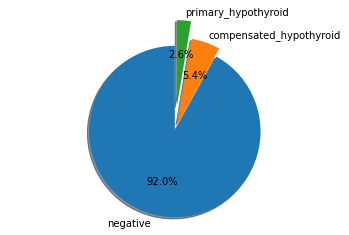

In [ ]:
plt.figure(figsize=(15, 15))

labels = 'negative', 'compensated_hypothyroid', 'primary_hypothyroid'
sizes = [3302, 194, 95]
explode = (0, 0.1, 0.3)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

<Figure size 1080x1080 with 0 Axes>

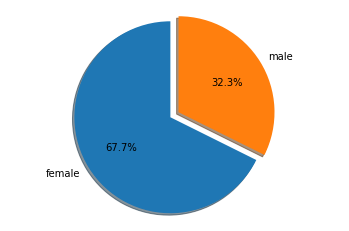

In [ ]:
plt.figure(figsize=(15, 15))

labels = 'female', 'male'
sizes = [2332, 1115]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

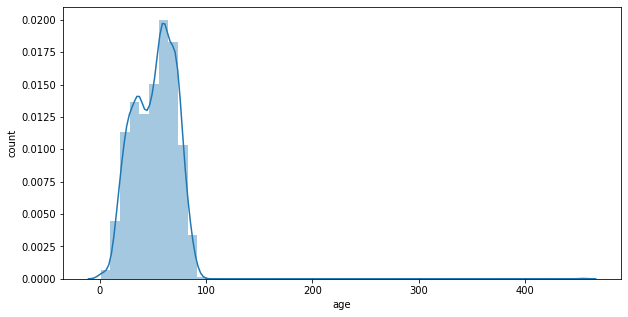

In [ ]:
plt.figure(figsize=(10, 5))
sns.distplot(df['age'])
plt.xlabel('age')
plt.ylabel('count')
plt.show()

Посмотрим, можно ли визуально отличить распределение возрастов в группах с различными значениям признака "Class":

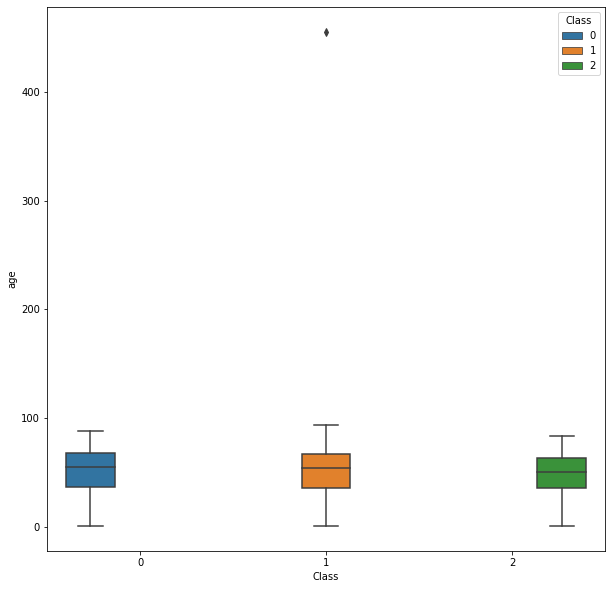

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Class', y='age', hue='Class', data=df)
plt.show()

Какой-то очень странный выброс. Но с ним мы разберемся позже в пункте Outliers.

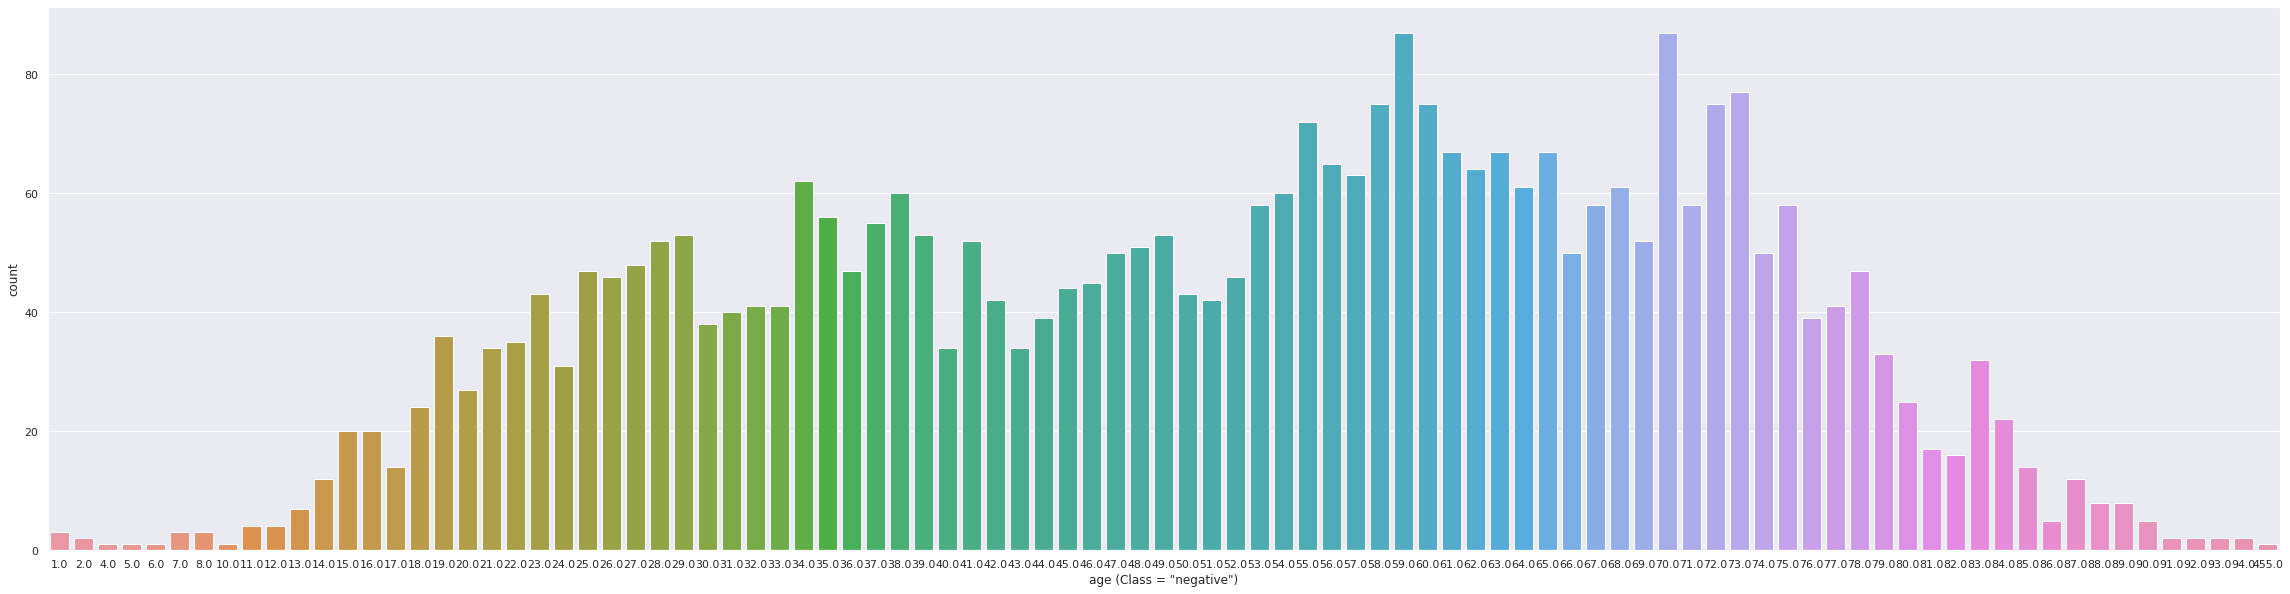

In [ ]:
sns.set(font_scale=1)
plt.figure(figsize=(40, 10))
sns.countplot(x='age', data=df[df.Class == 1])
plt.xlabel('age (Class = "negative")')
plt.show()
sns.set(font_scale=2)

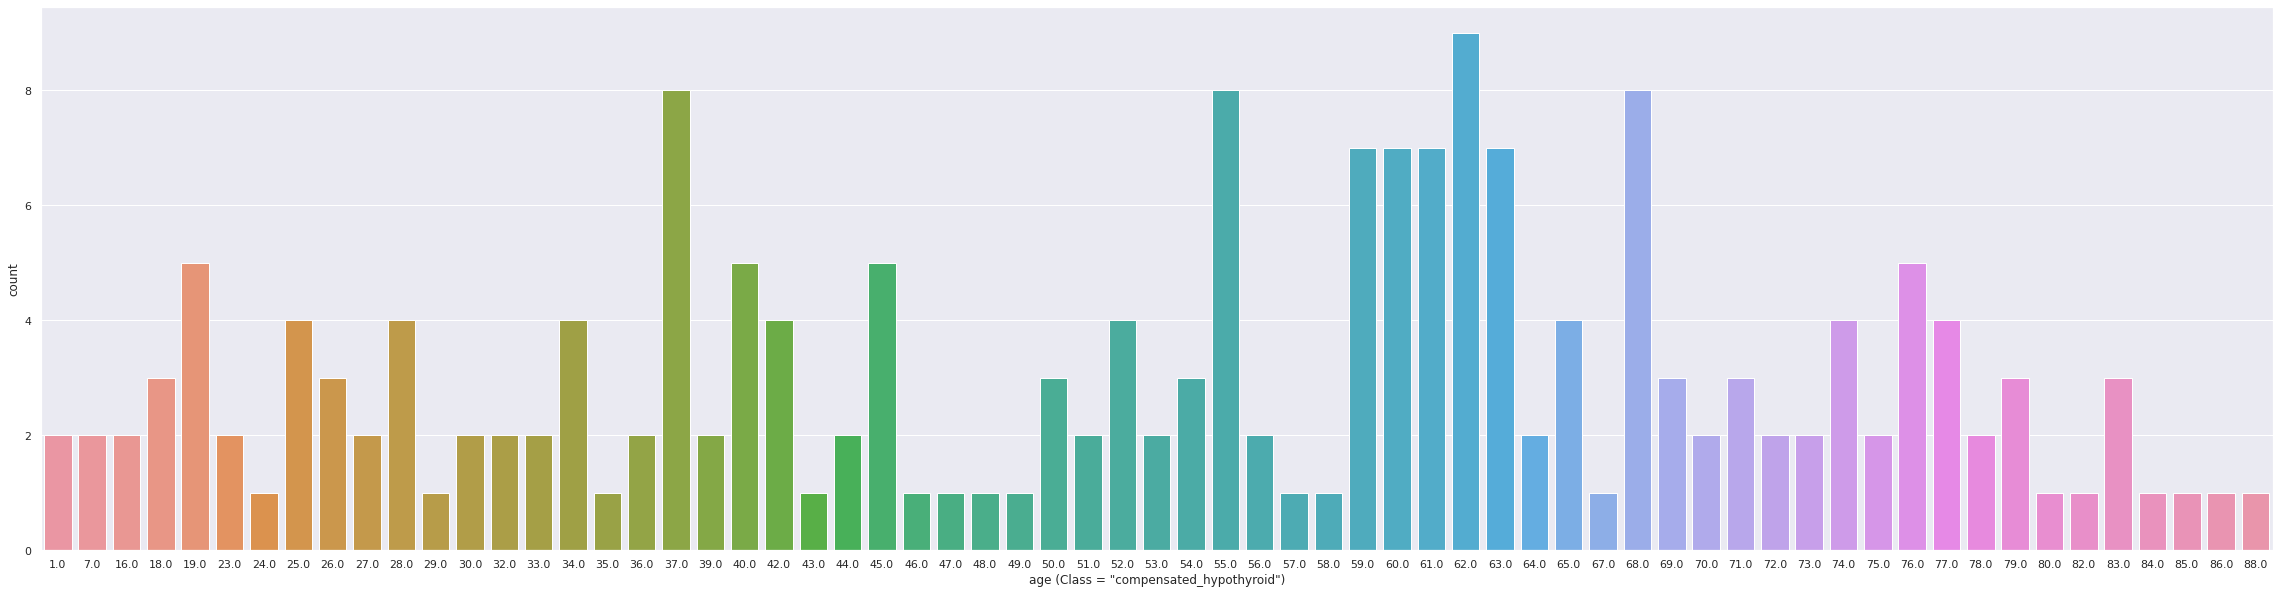

In [ ]:
sns.set(font_scale=1)
plt.figure(figsize=(40, 10))
sns.countplot(x='age', data=df[df.Class == 0])
plt.xlabel('age (Class = "compensated_hypothyroid")')
plt.show()
sns.set(font_scale=2)

Очень много подтвержденных диагнозов "compensated_hypothyroid" в возрасте 60ти.

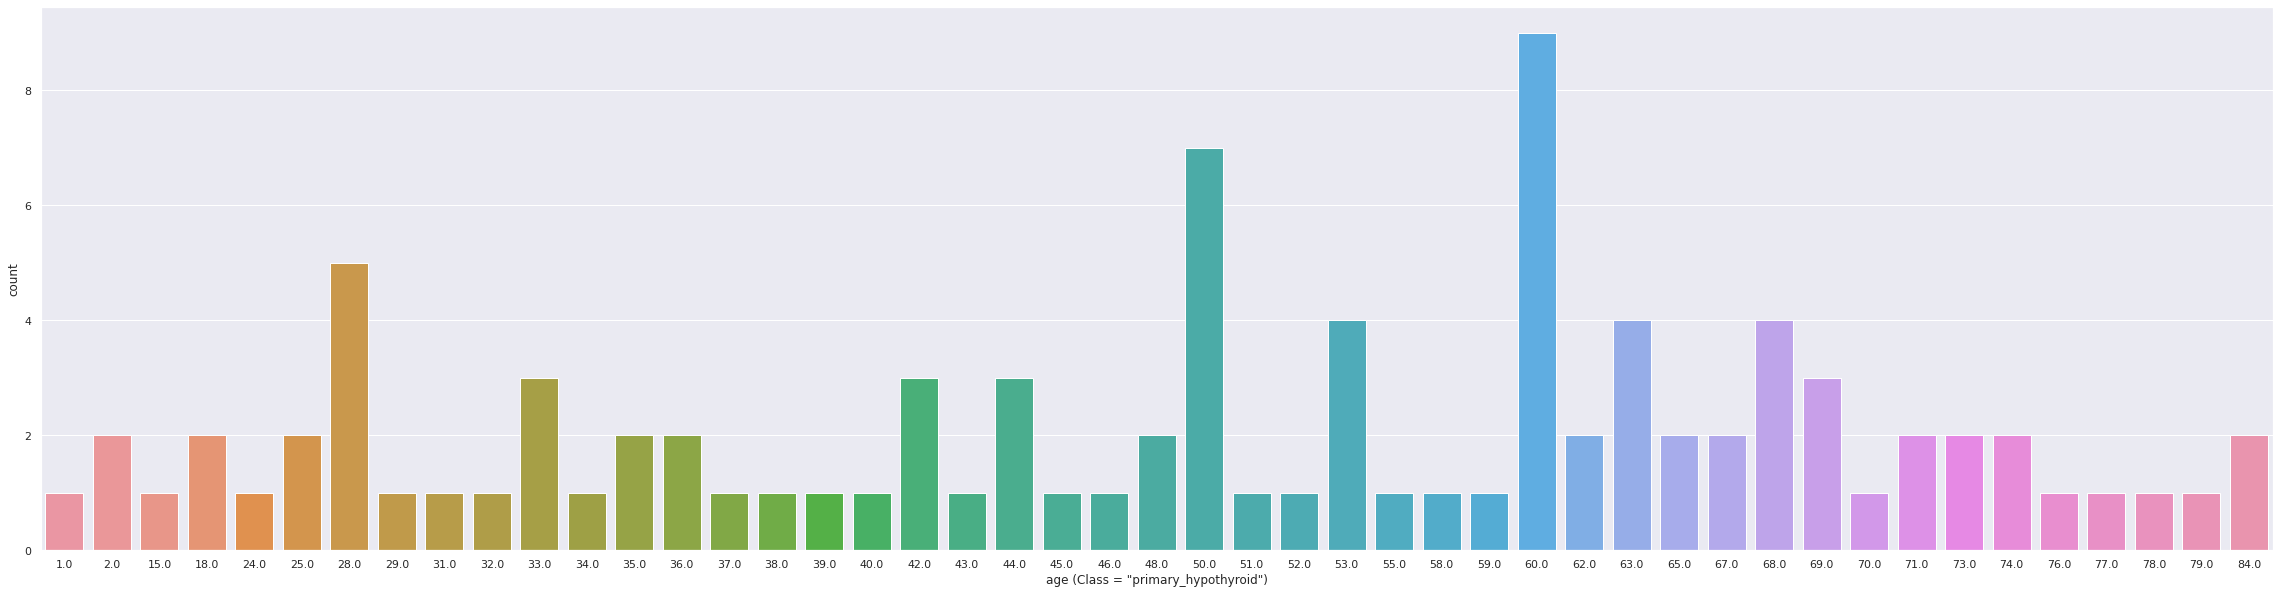

In [ ]:
sns.set(font_scale=1)
plt.figure(figsize=(40, 10))
sns.countplot(x='age', data=df[df.Class == 2])
plt.xlabel('age (Class = "primary_hypothyroid")')
plt.show()
sns.set(font_scale=1)

Есть странные пики. Но основной рост заболеваний primary_hypothyroid зарегистрирован у людей в возрасте 60 - 70ти лет.

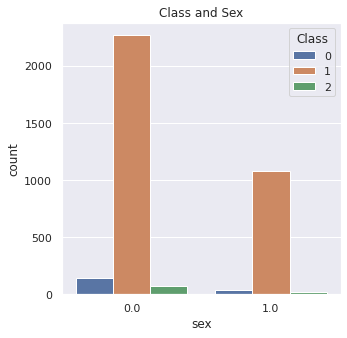

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(df.sex, hue = df.Class)
plt.title('Class and Sex')
plt.show()

0 = female

1 = male

#### Handling missing values

Заполнять NaNs мы будем с помощью алгоритма K Nearest Neighbours.

In [ ]:
imputer = KNNImputer(n_neighbors=5)

In [ ]:
matrix = imputer.fit_transform(df)
matrix

array([[ 41.,   0.,   0., ..., 109.,   1.,   1.],
       [ 23.,   0.,   0., ..., 106.,   4.,   1.],
       [ 46.,   1.,   0., ..., 120.,   4.,   1.],
       ...,
       [ 74.,   0.,   0., ..., 105.,   4.,   1.],
       [ 72.,   1.,   0., ...,  87.,   3.,   1.],
       [ 64.,   0.,   0., ...,  92.,   4.,   1.]])

In [ ]:
column = df.columns
df = pd.DataFrame(data = matrix, columns = column)
df.sample(5).T

,114,2203,596,1304,2352
age,65.00,77.00,44.00,78.00,63.00
sex,0.00,0.00,0.00,0.00,0.00
on_thyroxine,0.00,0.00,0.00,0.00,0.00
query_on_thyroxine,0.00,0.00,0.00,0.00,0.00
on_antithyroid_medication,0.00,0.00,0.00,0.00,0.00
sick,0.00,0.00,0.00,0.00,0.00
pregnant,0.00,0.00,0.00,0.00,0.00
thyroid_surgery,0.00,0.00,0.00,0.00,0.00
I131_treatment,0.00,0.00,0.00,0.00,0.00
query_hypothyroid,0.00,0.00,0.00,0.00,0.00


In [ ]:
# Посчитаем, а сколько всего Nan
df.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
referral_source              0
Class                        0
dtype: int64

Мы, кстати, еще не интересовались дубликатами, есть ли они?

In [ ]:
df.duplicated(keep = 'first').value_counts()

False    3709
True       61
dtype: int64

61 - не особо критично. Поэтому можно его удалить.

In [ ]:
df.drop_duplicates(inplace=True)

#### Outliers

С выбросами будем работать с IsolationForest.

In [ ]:
clf = IsolationForest(max_samples=2000, random_state=1, contamination = 0.1)

In [ ]:
preds = clf.fit_predict(df)
df['anomaly'] = pd.Series(preds, index = df.index)

Сколько процентов от изначальных данных осталось?

In [ ]:
len(df[df.anomaly !=-1])/len(df)*100

89.99730385548665

In [ ]:
df=df[df.anomaly !=-1]

In [ ]:
df.shape

(3338, 28)

После проведенной всей работы посмотрим на данные еще раз.

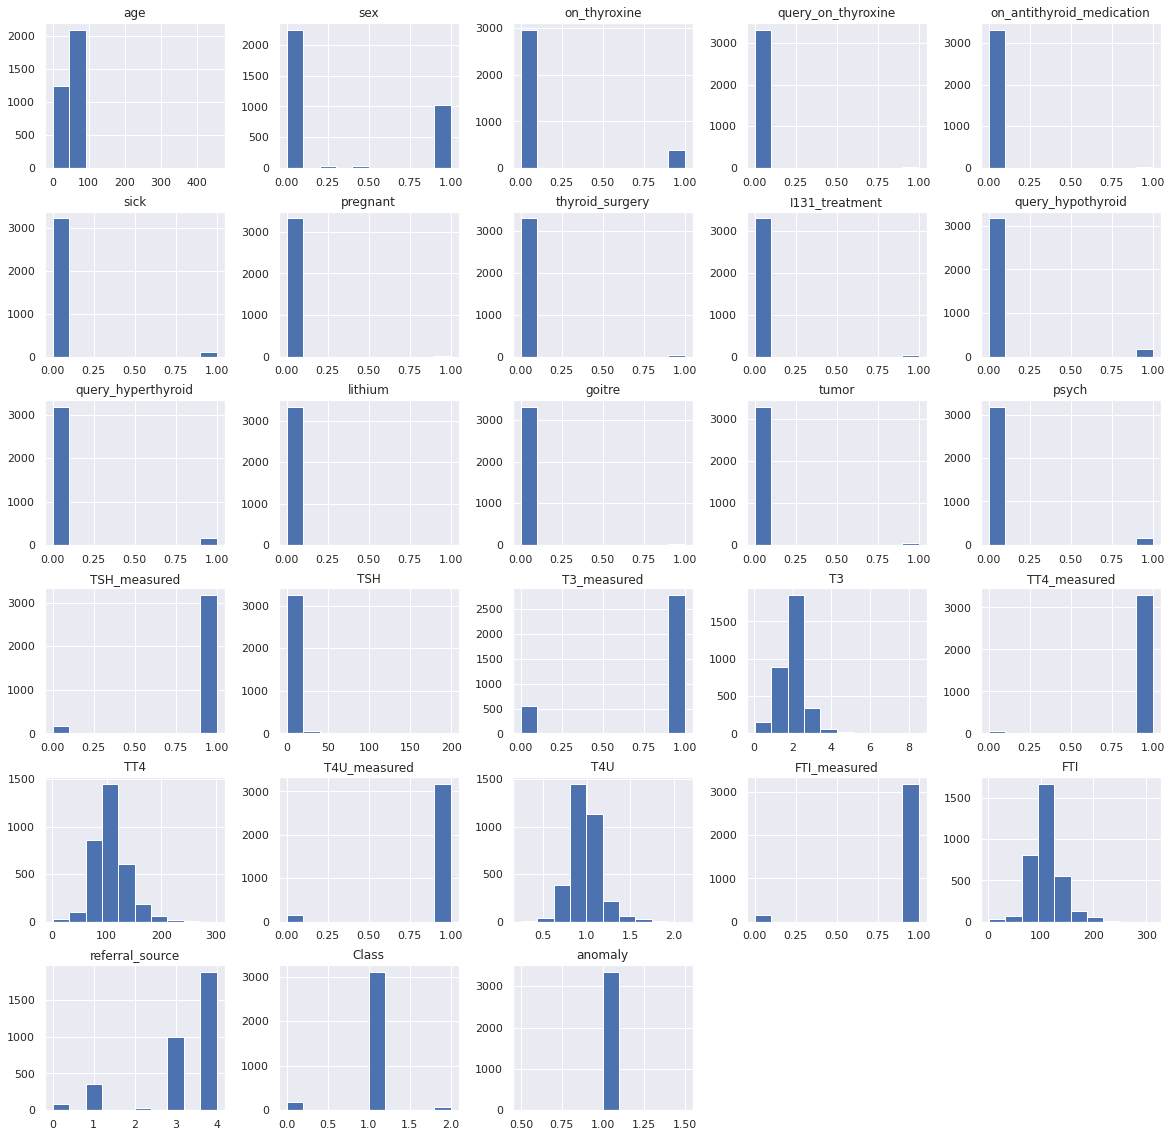

In [ ]:
df.hist(figsize = (20,20))
plt.show()

#### Data normalization

В некоторых столбцах у нас данные с разными масштабами. Это может не очень сказаться при реализации таких алгоритмов как k-Nearest соседей, которые используют вычисления расстояний и линейную регрессию.

In [ ]:
scaler = MinMaxScaler()

In [ ]:
matrix = scaler.fit_transform(df)

In [ ]:
df_new = pd.DataFrame(data = matrix, columns = df.columns)
df = df_new
df.sample(5).T

,736,2240,2196,946,1578
age,0.145374,0.066079,0.099119,0.182819,0.156388
sex,1.000000,0.000000,0.000000,0.000000,0.000000
on_thyroxine,0.000000,0.000000,0.000000,0.000000,0.000000
query_on_thyroxine,0.000000,0.000000,0.000000,0.000000,0.000000
on_antithyroid_medication,0.000000,0.000000,0.000000,0.000000,0.000000
sick,0.000000,0.000000,0.000000,0.000000,0.000000
pregnant,0.000000,0.000000,0.000000,0.000000,0.000000
thyroid_surgery,0.000000,0.000000,0.000000,0.000000,0.000000
I131_treatment,0.000000,0.000000,0.000000,0.000000,0.000000
query_hypothyroid,0.000000,0.000000,0.000000,0.000000,0.000000


#### Conclusion

В первой части данной работы у нас представлен разведочный анализ данных, плавно перетекающий в этап подготовки данных.

Было проведено:

    1. Работа с пропущенными значениями (несколько строк было полностью удалено, остальные же пропуски были заполнены помощью KNN);
    
    2. Удалены дубликаты (после пункта 1 там "выжил" лишь один экземпляр);
    
    3. Работа с категориальными данными с помощью LabelEncoding и просто бинарного кодирования;
    
    4. Проанализировали особенности распределений некоторых переменных.
    
    5.  Работа с выбросами с помощью метода IsolatedForest;
    
    6. Проведена стандартизация с помощью MinMaxScaler.

### 3. Models

#### a. Auxiliary functions

In [ ]:
def data_split(df):
    X = df.drop('Class', axis=1)
    y = df['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test

In [ ]:
def normalized_confusion_matrix (y, predictions):
    conf = confusion_matrix(y, predictions, normalize = 'true')
    sns.heatmap(conf,
                annot=conf/np.sum(conf,axis=1), #normalized by true class sizes
                yticklabels=['negative', 'compensated_hypothyroid','primary_hypothyroid'],
                xticklabels=['negative', 'compensated_hypothyroid','primary_hypothyroid'],  
                cmap= 'Blues');
    plt.title('Logistic regression confusion matrix');
    plt.xlabel('Predicted label');
    plt.ylabel('True label');

#### b. Metrics and cross-validation have been chosen based on target distribution as well as reasoning behind

Что за метрики будем использовать и почему?

У нас в target всего 3 класса. Значит, будем использовать мультиклассификатор f1_score. Он представляет собой среднее гармоническое таких метрик как precision и recall. Будем использовать weighted average. Хотя можно попробовать и micro average. Мы попробуем это сделать в самом конце.

Также будем использовать StratifiedKFold. Он сначала перед разделением перемешивает данные, и только после этого разбивает их на n частей, каждую из которых он будет использовать в качестве тестового набора.

Чтобы несколько раз не писать одно и тоже, создадим свой классификатор:

In [ ]:
Scorer = make_scorer(f1_score, average='weighted')
cv = StratifiedKFold(5)

Чтобы не мучаться со всеми этими моделями, составим функцию, и будем ее везде использовать.

In [ ]:
def model_for_everything (estimator, df, parameters, scoring, cv):
    
    data_split(df)
    
    clf = GridSearchCV(estimator, param_grid = parameters,
                   scoring=Scorer, cv=cv, verbose=3)

    clf.fit(X_train.values, y_train)
    y_pred = clf.predict(X_test.values)
    
    print ('Best parametrs:')
    print(clf.best_params_)
    print(classification_report(y_test, y_pred))
    
    normalized_confusion_matrix (y_test, y_pred)

#### c. Logistic Regression with regularization

In [ ]:
parameters = [{'C': [0.1, 0.5, 1, 3, 5, 10, 25]}]

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.951, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.954, total=   0.1s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ............................... C=0.1, score=0.963, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.952, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.931, total=   0.1s
[CV] C=0.5 ...........................................................
[CV] ............................... C=0.5, score=0.957, total=   0.1s
[CV] C=0.5 ...........................................................
[CV] ............................... C=0.5, score=0.953, total=   0.1s
[CV] C=0.5 ...........................................................
[CV] ............................... C=0.5, score=0.959, total=   0.1s
[CV] C=0.5 ...........................................................
[CV] ............................... C=0.5, score=0.948, total=   0.1s
[CV] C=0.5 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    2.7s finished


Best parametrs:
{'C': 5}
              precision    recall  f1-score   support

         0.0       0.55      0.98      0.71        58
         1.0       1.00      0.96      0.98       990
         2.0       0.85      0.79      0.82        29

    accuracy                           0.95      1077
   macro avg       0.80      0.91      0.84      1077
weighted avg       0.97      0.95      0.96      1077



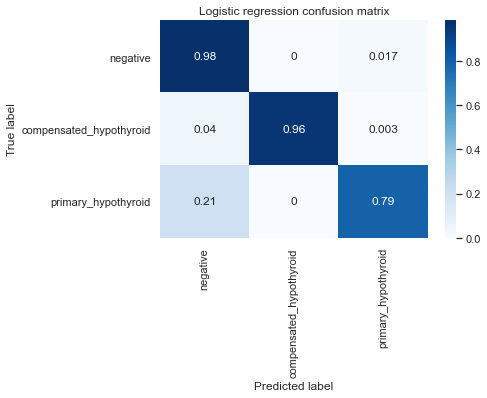

In [ ]:
model_for_everything (LogisticRegression(random_state=42, class_weight='balanced'), df, parameters, Scorer, cv)

Вспомним, что:
    
negative   (отрицательный)                1

compensated_hypothyroid  (вторичный гипотериоз)   0

primary_hypothyroid (первичный гипотериоз)         2


Заметим, что наша модель имеет достаточно высокую точность при выявлении отрицательных диагнозов, а также вторичного гипотериоза. И лишь 79 % больных первичным гипотериозом определяются правильно. Это неплохо, но хотелось бы лучше.

#### d. Logistic Regression without regularization

In [ ]:
parameters = [{'C': [1]}]

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.960, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.953, total=   0.1s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ................................. C=1, score=0.958, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.946, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.932, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


Best parametrs:
{'C': 1}
              precision    recall  f1-score   support

         0.0       0.54      0.98      0.70        58
         1.0       1.00      0.95      0.98       990
         2.0       0.85      0.79      0.82        29

    accuracy                           0.95      1077
   macro avg       0.80      0.91      0.83      1077
weighted avg       0.97      0.95      0.96      1077



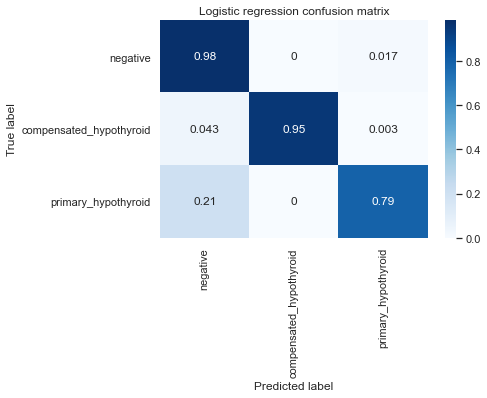

In [ ]:
model_for_everything (LogisticRegression(random_state=42, class_weight='balanced'), df, parameters, Scorer, cv)

Результат лишь немного в худшую сторону отличается от предыдущего.

#### e. K-nearest neighbours

In [ ]:
parameters = [{'n_neighbors': np.arange(1,10)}]

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.940, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.934, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.943, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.938, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.939, total=   0.0s
[CV] n_neighbors=2 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... n_neighbors=2, score=0.941, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.932, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.941, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.932, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.932, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.938, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.940, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.7s finished


Best parametrs:
{'n_neighbors': 4}
              precision    recall  f1-score   support

         0.0       0.71      0.41      0.52        58
         1.0       0.96      0.99      0.98       990
         2.0       0.96      0.79      0.87        29

    accuracy                           0.96      1077
   macro avg       0.88      0.73      0.79      1077
weighted avg       0.95      0.96      0.95      1077



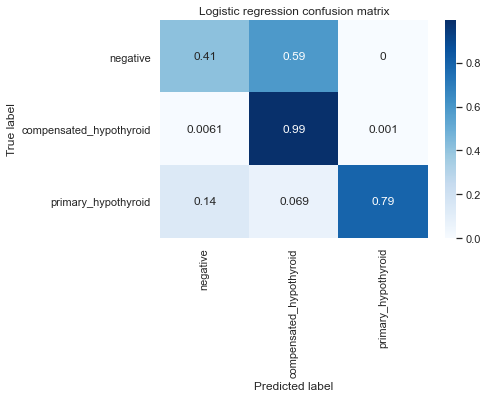

In [ ]:
model_for_everything (KNeighborsClassifier(algorithm='kd_tree'), df, parameters, Scorer, cv)

Результаты стали хуже. Теперь отрицательные результаты угадываются лишь на 41%, а не на 98, как раньше. 

Интересно, что если проделать то же самое, заменив weightened average в Scorer, на micro average, то результаты при использовании логической регрессии не изменятся.

В случае применения KNN они становятся значительно хуже. И точность определения отрицательных результатов снижается до 36.

#### f. Conclusion

Подводя итоги, в третьей части были рассмотрены три модели:
    
    - линейная регрессия с регуляризацией
    
    - линейная регрессия с регуляризацией    
    
    - KNN.

Для каждой из моделей были подобраны наилучшие параметры по сетке с помощью метода GridSearch. 

В результате выяснилось, что наиболее результативной является Логическая регрессия с регуляризацией ('C': 5). Она позволяет давать отрицательные диагнозы с 98% вероятностью, вторичный гипотериоз с точностью в 96%. А точное выявление первичного гипотериоза происходит в 79 случаях из 100.